In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [7]:
correlation_with_target = data.corr()['Class']

threshold = 0.0

negative_corr_features = correlation_with_target[correlation_with_target < threshold].index.tolist()

data = data.drop(negative_corr_features, axis=1)


In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
data.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
Name: Class, dtype: float64

In [10]:
y=data['Class']
x=data.drop("Class",axis=1)

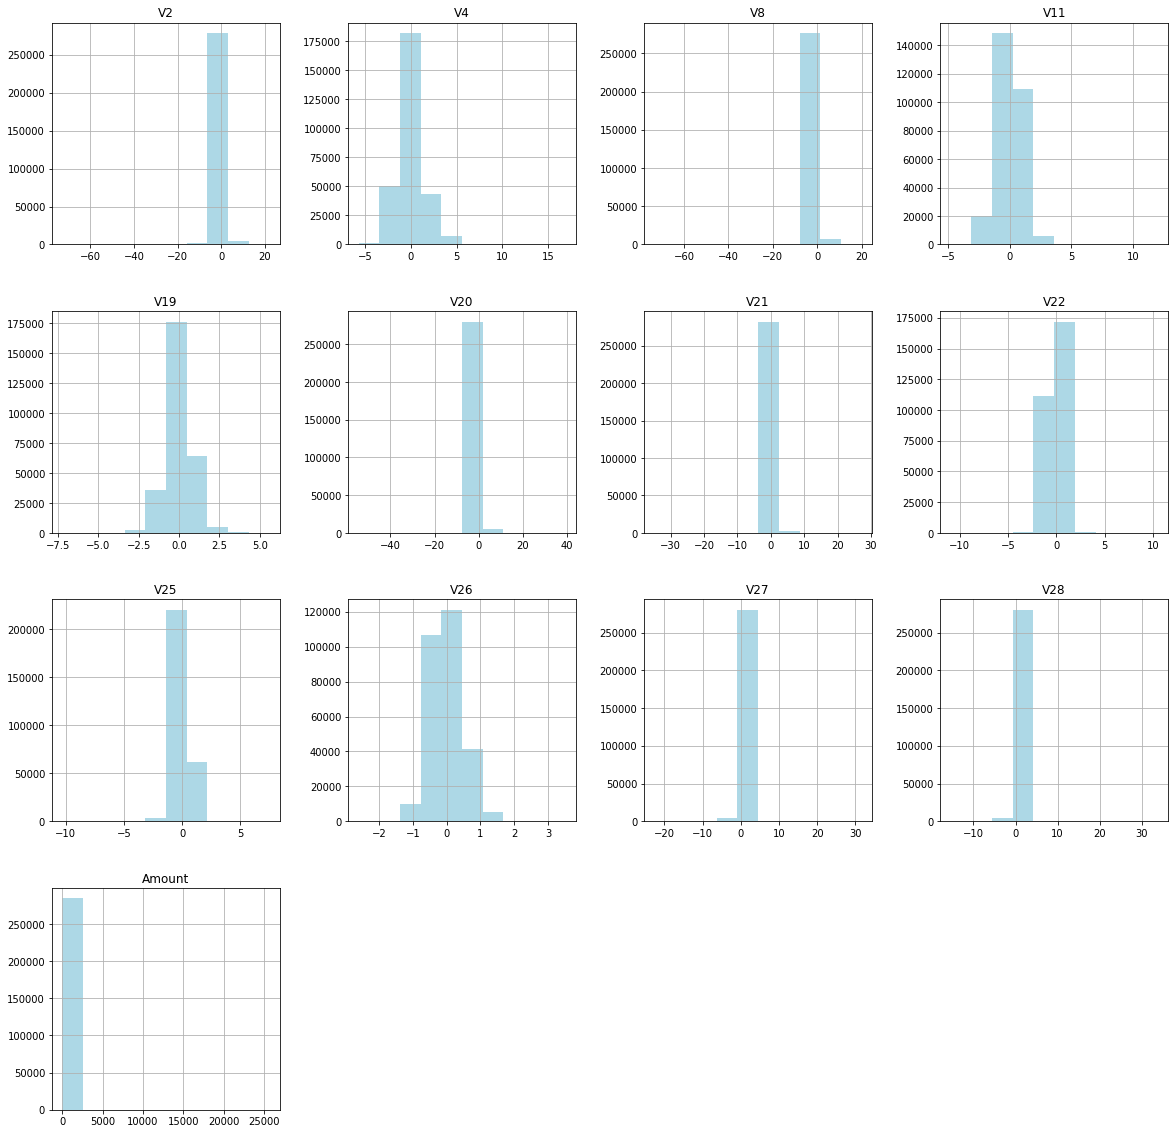

In [11]:
x.hist(figsize=(20,20),color="lightblue")
plt.show()

In [12]:
x['Amount'].max()

25691.16

In [13]:
x['Amount'].value_counts()[x['Amount'].max()]

1

In [14]:
for o in x.columns[::-1]:
    median = x[o].median()
    std = x[o].std()
    outliers = (x[o] - median).abs() > std
    x[o][outliers] = np.nan
    x[o].fillna(x[o].value_counts().index[0], inplace=True)

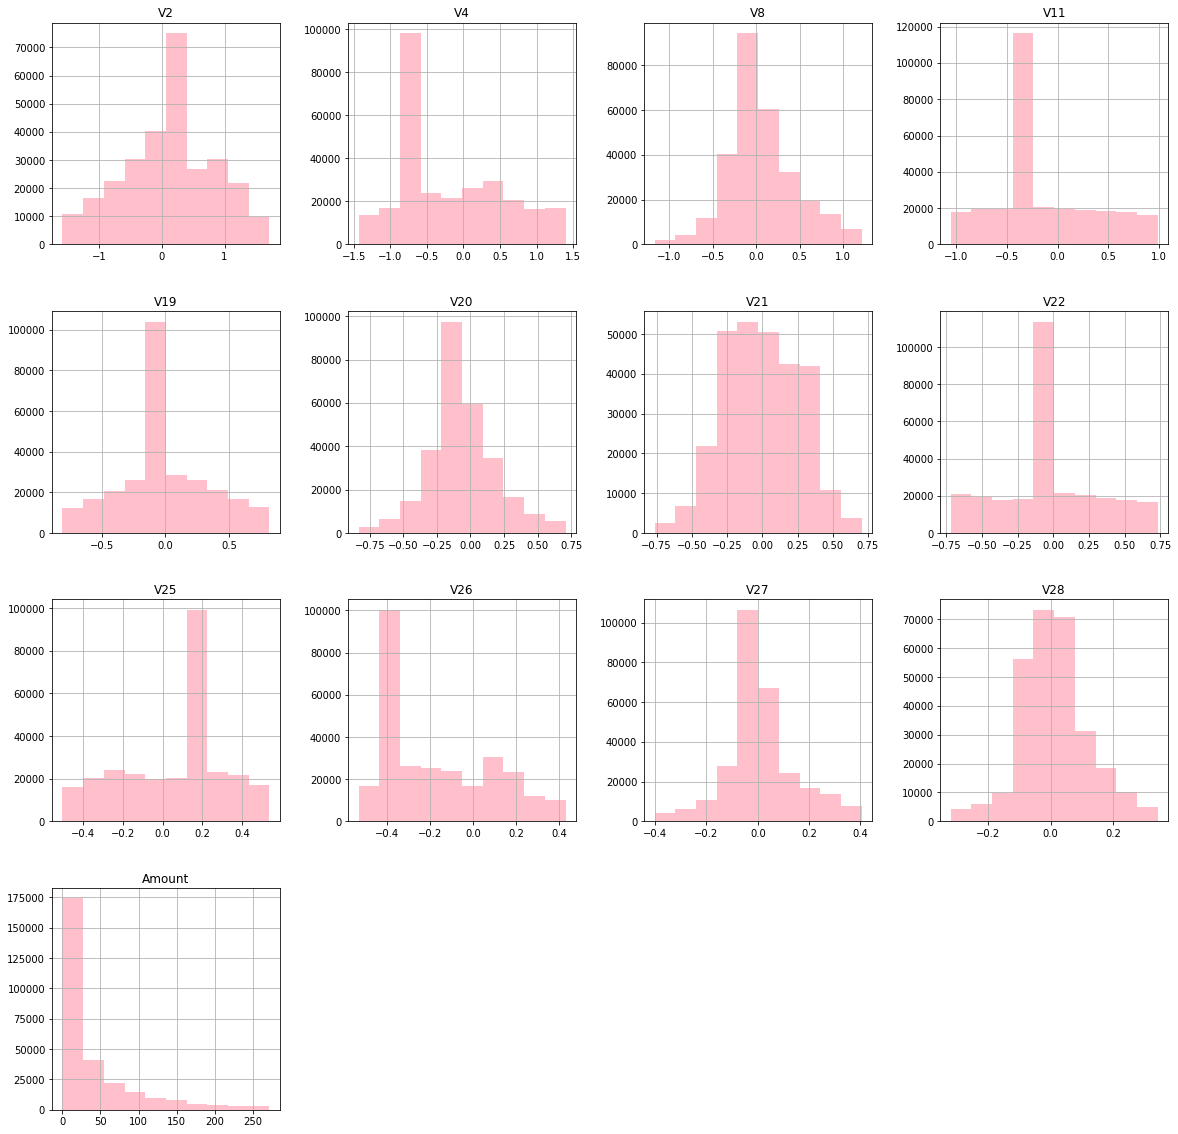

In [15]:
x.hist(figsize=(20,20),color='pink')
plt.show()

In [16]:
for i in x.columns:
    x[i]=minmax_scale(x[i])

In [17]:
x,y=SMOTE(sampling_strategy='auto').fit_resample(x,y)


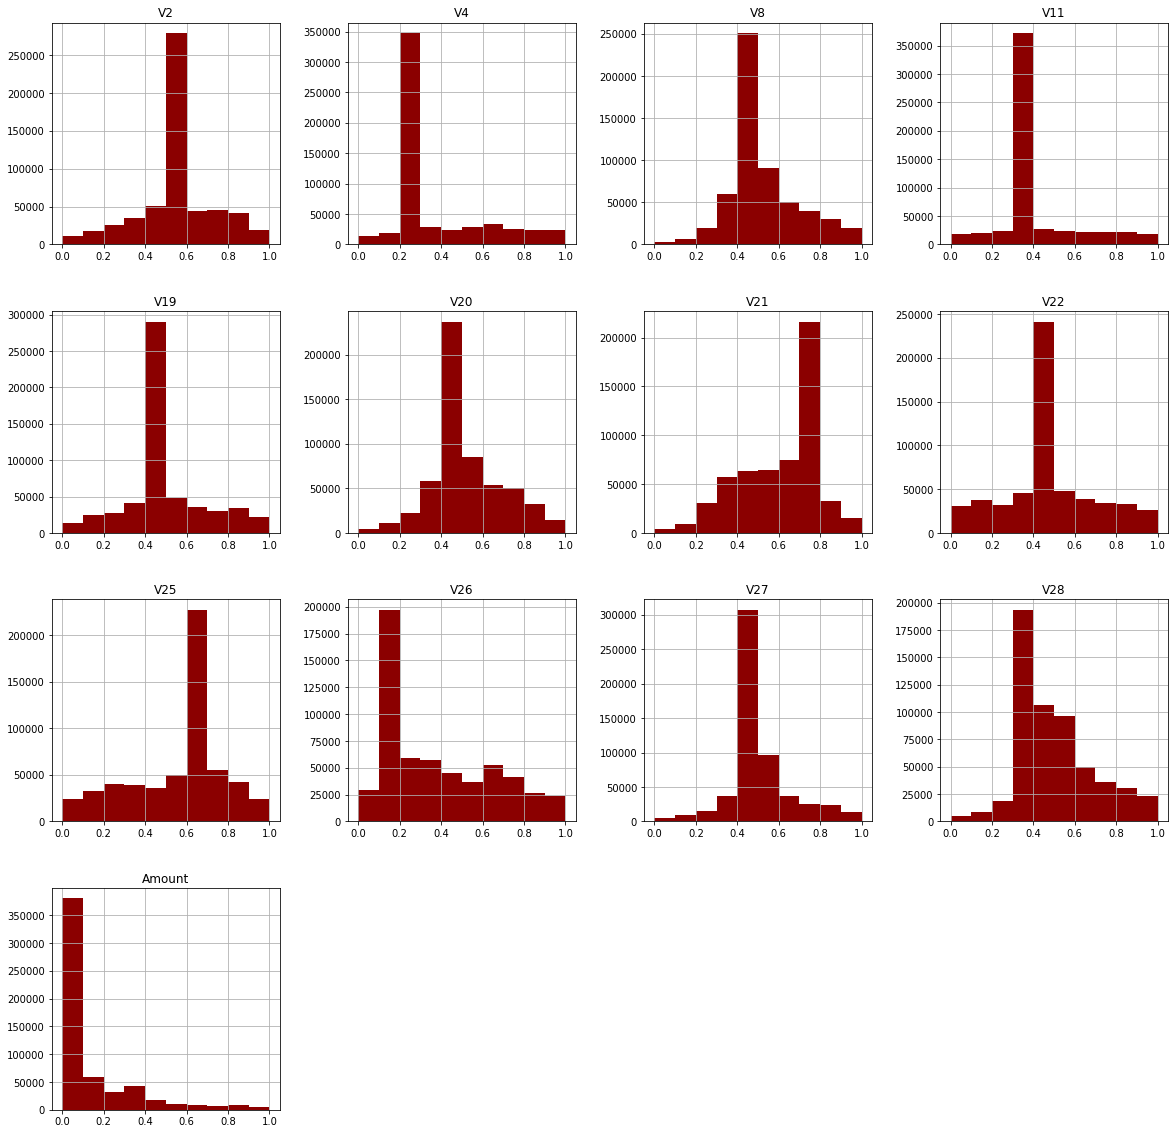

In [18]:
x.hist(figsize=(20,20),color='darkred')
plt.show()

<Axes: >

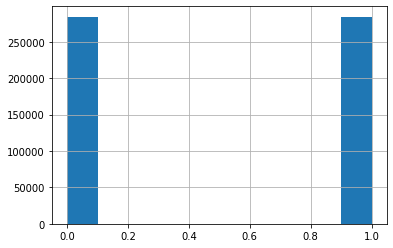

In [19]:
y.hist()

In [20]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=.3)

In [21]:
model=RandomForestClassifier().fit(xtr,ytr)
print(model.score(xtr,ytr))
print(model.score(xte,yte))
recall = recall_score(yte,model.predict(xte),average='micro')
precision = precision_score(yte,model.predict(xte),average='micro')
f1 = 2 * ((precision*recall)/ (precision+recall))
print(recall,precision,f1)

0.9999974876959912
0.9995075884142588
0.9995075884142588 0.9995075884142588 0.9995075884142588


In [22]:
model=LogisticRegression().fit(xtr,ytr)
print(model.score(xtr,ytr))
print(model.score(xte,yte))
from sklearn.metrics import recall_score,precision_score
recall = recall_score(yte,model.predict(xte),average='micro')
precision = precision_score(yte,model.predict(xte),average='micro')
f1 = 2 * ((precision*recall)/ (precision+recall))
print(recall,precision,f1)

0.790267836730387
0.7898047353580829
0.7898047353580829 0.7898047353580829 0.789804735358083


In [23]:
model=DecisionTreeClassifier(max_depth=15).fit(xtr,ytr)
print(model.score(xtr,ytr))
print(model.score(xte,yte))
recall = recall_score(yte,model.predict(xte),average='micro')
precision = precision_score(yte,model.predict(xte),average='micro')
f1 = 2 * ((precision*recall)/ (precision+recall))
print(recall,precision,f1)

0.9834363796694311
0.9797466425150508
0.9797466425150508 0.9797466425150508 0.9797466425150508
